### Punkt 5.

Verbessere dieses Modell, sodass es die beste Statistik liefert. Achte hierbei darauf,
dass du dein adj. R² maximieren willst. Das höchste adj. R² ist also perfekt für die
Vorhersage! Achte weiter darauf, wie Variablen in der Regression behandelt werden:
Können also wirklich alle Variablen einfach eingesetzt werden oder muss man Python
an manchen Stellen noch beibringen, dass sich innerhalb einer Variable Kategorien
befinden zum Unterscheiden und nicht einfach Zahlen ausgewertet werden können?
Beispiel: Geschlecht 1 und 2 versteht Python nicht als Kategorie; Geschlecht „Männlich“ und „Weiblich“ jedoch durchaus!

                             OLS Regression Results                            
Dep. Variable:     Lebenszufriedenheit   R-squared:                         nan
Model:                             OLS   Adj. R-squared:                    nan
Method:                  Least Squares   F-statistic:                       nan
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):                nan
Time:                         18:21:31   Log-Likelihood:                    nan
No. Observations:                  886   AIC:                               nan
Df Residuals:                      880   BIC:                               nan
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const 

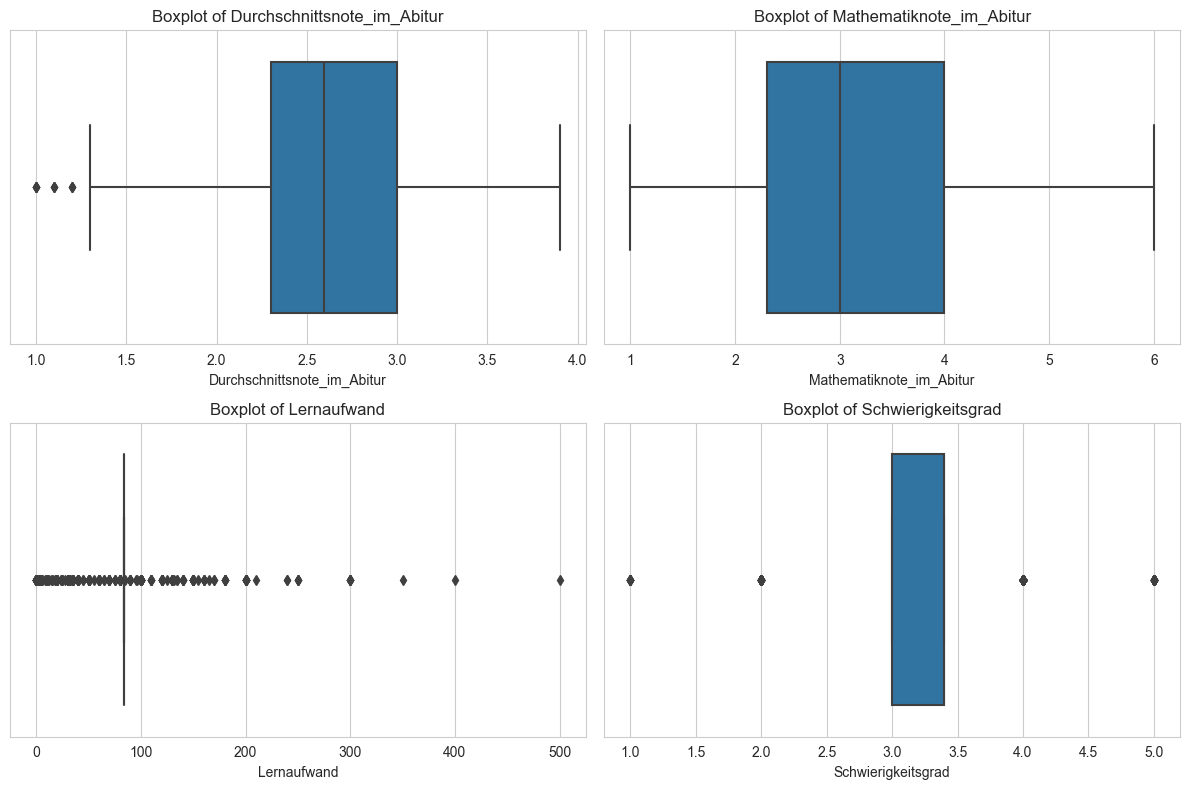

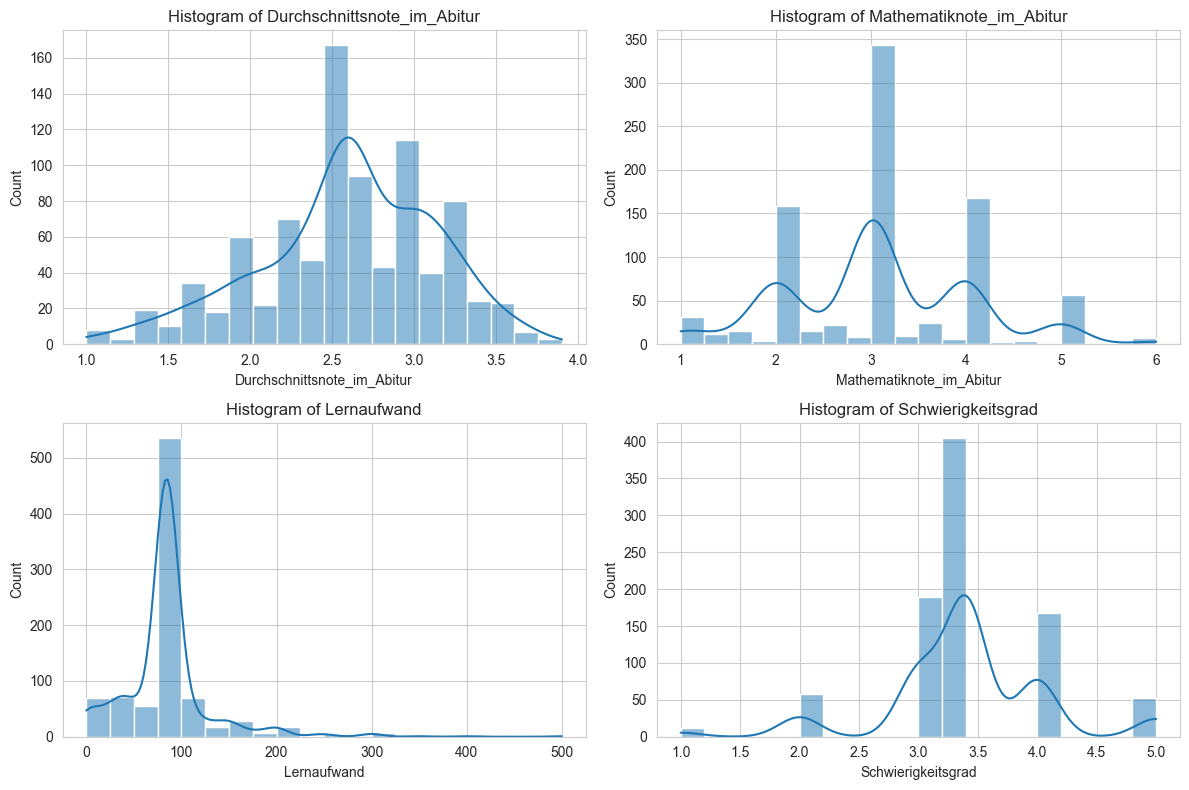

In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
uni_df = pd.read_excel("C:\\Users\\User\\Desktop\\Statistik\\Project\\Fallstudiendaten_Uni.xlsx")
uni_df

columns_list = ['Participant', 'Studiengang', 'Standort', 'Besuch Wirtschaftsmathematik', 'Geschlecht', 'Geburtsjahr', 'Beziehungsstatus', 'Durchschnittsnote im Abitur', 'Mathematiknote im Abitur', 'LK_Deutsch', 'LK_Mathe', 'LK_Englisch', 'Religion', 'Lernaufwand', 'Schwierigkeitsgrad', 'Umfang', 'Erwartungen', 'Zeit-Studium', 'Zeit-Praxispartner', 'Zeit-Nebenjob', 'Zeit-Hobbys', 'Zeit-Freizeit', 'Zeit-Hausarbeit', 'Zeit-Essen', 'Zeit-Schlafen', 'Zeit-Sonstiges', 'Wechsel Praxispartner', 'Lebenszufriedenheit', 'Zufriedenheit mit Praxispartner', 'Zufriedenheit mit finanzieller Situation', 'Zufriedenheit mit Gesundheit', 'Zufriedenheit mit Kommilitonenaustausch', 'Studienzufriedenheit', 'Mathenote im 2. Semester', 'Zufriedenheit mit Note']

columns_without_spaces = [column_name.replace(" ","_").replace("-","_").replace(".","") for column_name in columns_list]
uni_df.columns = columns_without_spaces

dependent_variable = 'Lebenszufriedenheit'
selected_variables = ['Durchschnittsnote_im_Abitur', 'Mathematiknote_im_Abitur', 'Lernaufwand', 'Schwierigkeitsgrad', 'Zufriedenheit_mit_Gesundheit']

# Step 1: Data cleaning
uni_df_cleaned = uni_df.copy()


for column in selected_variables:
    if uni_df_cleaned[column].isnull().any():
        uni_df_cleaned[column].fillna(uni_df_cleaned[column].mean(), inplace=True)  # or use .median()


for column in selected_variables:
    if np.isinf(uni_df_cleaned[column]).any():
        uni_df_cleaned[column].replace([np.inf, -np.inf], np.nan, inplace=True)
        uni_df_cleaned[column].fillna(1e9, inplace=True)


uni_df_cleaned = pd.get_dummies(uni_df_cleaned, columns=['Geschlecht'], drop_first=True)


x = uni_df_cleaned[selected_variables]
y = uni_df_cleaned[dependent_variable]
X = sm.add_constant(x)  # Adding a constant (for the intercepts)

model = sm.OLS(y, X).fit()


print(model.summary())

# Vizalizerung
plt.figure(figsize=(12, 8))
num_plots = min(len(selected_variables), 4)

for i, variable in enumerate(selected_variables[:num_plots]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=variable, data=uni_df_cleaned)
    plt.title(f"Boxplot of {variable}")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, variable in enumerate(selected_variables[:num_plots]):
    plt.subplot(2, 2, i+1)
    sns.histplot(uni_df_cleaned[variable], bins=20, kde=True)
    plt.title(f"Histogram of {variable}")

plt.tight_layout()
plt.show()



In [2]:
uni_df

,Participant,Studiengang,Standort,Besuch_Wirtschaftsmathematik,Geschlecht,Geburtsjahr,Beziehungsstatus,Durchschnittsnote_im_Abitur,Mathematiknote_im_Abitur,LK_Deutsch,...,Zeit_Sonstiges,Wechsel_Praxispartner,Lebenszufriedenheit,Zufriedenheit_mit_Praxispartner,Zufriedenheit_mit_finanzieller_Situation,Zufriedenheit_mit_Gesundheit,Zufriedenheit_mit_Kommilitonenaustausch,Studienzufriedenheit,Mathenote_im_2_Semester,Zufriedenheit_mit_Note
0,53,4,21,5.0,1,24.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55,4,21,6.0,2,19.0,3.0,3.0,3.0,0.0,...,1.0,2.0,5.0,3.0,2.0,5.0,7.0,7.0,1.3,2.0
2,56,4,21,6.0,2,22.0,1.0,3.3,2.8,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,57,16,21,8.0,2,21.0,2.0,2.3,3.0,1.0,...,NaN,2.0,6.0,3.0,2.0,6.0,5.0,6.0,NaN,NaN
4,58,16,21,5.0,1,19.0,1.0,NaN,NaN,NaN,...,NaN,3.0,10.0,10.0,6.0,10.0,5.0,10.0,1.7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,1022,24,18,NaN,2,23.0,NaN,2.0,2.0,0.0,...,36.0,3.0,4.0,6.0,10.0,3.0,1.0,6.0,2.0,3.0
882,1023,24,18,NaN,2,23.0,2.0,3.3,4.0,0.0,...,NaN,3.0,9.0,8.0,5.0,10.0,6.0,7.0,4.0,2.0
883,1024,4,18,NaN,1,20.0,NaN,NaN,3.0,0.0,...,31.0,3.0,7.0,7.0,3.0,6.0,8.0,6.0,3.7,3.0
884,1025,5,18,6.0,1,22.0,1.0,2.0,2.0,0.0,...,NaN,3.0,8.0,8.0,7.0,9.0,9.0,9.0,3.0,2.0
